In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
df = pd.read_csv("Churn_Modelling.csv")

In [13]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5723,687,France,Female,26,6,0.00,2,1,1,32909.13,0
5947,656,France,Female,45,7,145933.27,1,1,1,199392.14,0
5954,850,France,Male,33,0,124781.67,1,0,1,33700.52,0
8251,629,Germany,Female,37,1,35549.81,2,0,0,49676.33,0
4153,695,Germany,Female,53,8,95231.91,1,0,0,70140.80,1
7393,599,France,Male,28,7,119706.22,1,0,0,31190.42,0
253,544,Germany,Male,37,2,79731.91,1,1,1,57558.95,0
2804,648,France,Female,44,2,0.00,2,1,1,58652.23,0
377,572,Spain,Male,35,4,152390.26,1,1,0,128123.66,0
9573,652,Germany,Male,35,7,104015.54,2,1,1,55207.88,0


In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

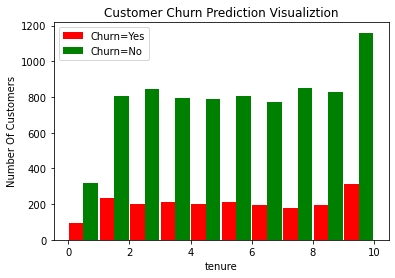

In [15]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [18]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [20]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [24]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8736,636,1,44,2,0.00,2,0,0,86414.41,0,1,0,0
7798,518,1,46,3,0.00,2,1,0,76515.79,0,1,0,0
3160,591,1,28,5,0.00,2,1,1,48606.92,0,1,0,0
1453,672,0,53,7,0.00,1,1,1,136910.18,0,1,0,0
2922,685,1,34,6,83264.28,1,0,0,9663.28,0,0,0,1


In [26]:
cols_to_scale = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [27]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1262,0.630,0,0.297297,0.1,0.691247,0.000000,0,1,0.583832,0,0,0,1
2201,0.500,1,0.229730,0.4,0.572921,0.333333,1,0,0.520374,0,1,0,0
1910,0.534,1,0.324324,0.0,0.279420,0.000000,1,1,0.604153,0,0,0,1
7349,0.564,1,0.324324,0.6,0.239030,0.333333,0,1,0.740878,0,0,1,0
6638,0.780,1,0.243243,0.4,0.687059,0.000000,1,1,0.432385,0,1,0,0


In [29]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [30]:
len(X_train.columns)

12

In [32]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 475us/step - loss: 0.5036 - accuracy: 0.7958
Epoch 2/100
250/250 [==============================] - 0s 463us/step - loss: 0.4672 - accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 463us/step - loss: 0.4547 - accuracy: 0.8018
Epoch 4/100
250/250 [==============================] - 0s 475us/step - loss: 0.4452 - accuracy: 0.8060
Epoch 5/100
250/250 [==============================] - 0s 475us/step - loss: 0.4362 - accuracy: 0.8114
Epoch 6/100
250/250 [==============================] - 0s 483us/step - loss: 0.4288 - accuracy: 0.8151
Epoch 7/100
250/250 [==============================] - 0s 483us/step - loss: 0.4225 - accuracy: 0.8165
Epoch 8/100
250/250 [==============================] - 0s 471us/step - loss: 0.4182 - accuracy: 0.8171
Epoch 9/100
250/250 [==============================] - 0s 463us/step - loss: 0.4114 - accuracy: 0.8225
Epoch 10/100
250/250 [==============================] - 0s 483us/step - l

250/250 [==============================] - 0s 471us/step - loss: 0.3301 - accuracy: 0.8668
Epoch 80/100
250/250 [==============================] - 0s 491us/step - loss: 0.3297 - accuracy: 0.8670
Epoch 81/100
250/250 [==============================] - 0s 471us/step - loss: 0.3292 - accuracy: 0.8668
Epoch 82/100
250/250 [==============================] - 0s 463us/step - loss: 0.3287 - accuracy: 0.8689
Epoch 83/100
250/250 [==============================] - 0s 483us/step - loss: 0.3284 - accuracy: 0.8648
Epoch 84/100
250/250 [==============================] - 0s 487us/step - loss: 0.3296 - accuracy: 0.8654
Epoch 85/100
250/250 [==============================] - 0s 455us/step - loss: 0.3283 - accuracy: 0.8654
Epoch 86/100
250/250 [==============================] - 0s 459us/step - loss: 0.3279 - accuracy: 0.8664
Epoch 87/100
250/250 [==============================] - 0s 487us/step - loss: 0.3282 - accuracy: 0.8677
Epoch 88/100
250/250 [==============================] - 0s 480us/step - loss:

In [33]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 448us/step - loss: 0.3476 - accuracy: 0.8530


[0.3476107716560364, 0.8529999852180481]

In [34]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.47      0.56       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

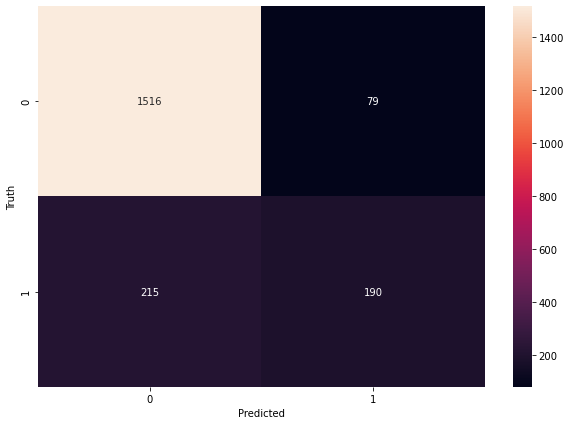

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')